# Keras Classification Code 1 - EDA and Reprocessing

Objective:

- how to perform a classification task with tensorflow
- how to identify and deal with overfitting through Eearly Stopping Callbacks and Dropout Layers

Early Stopping -> keras can automatically stop training based on a loss condition on the validation data passed dutig the model.fit()call

Drop Out Layers -> Can be added to layers to "turn off" neurons durong training to prevent overfitting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv ('cancer_classification.csv')
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [3]:
df.info()

#hasil tidak ada yang null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [6]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


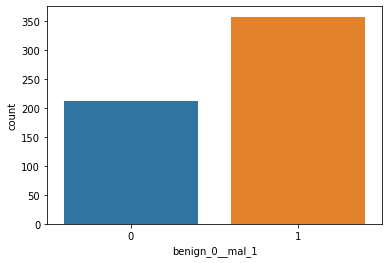

In [9]:
#to do count plot of actual label to see the number of instances per label
#see if it's well balanced or not


sns.countplot(x='benign_0__mal_1',data=df)

#mau liat jumlah data yg seusai label iya dan yg bukan
#label benign_0__mal_1 (cancer ini)

#hasilnya balanced

In [12]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [11]:
df.corr()['benign_0__mal_1'] #in respect with label

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

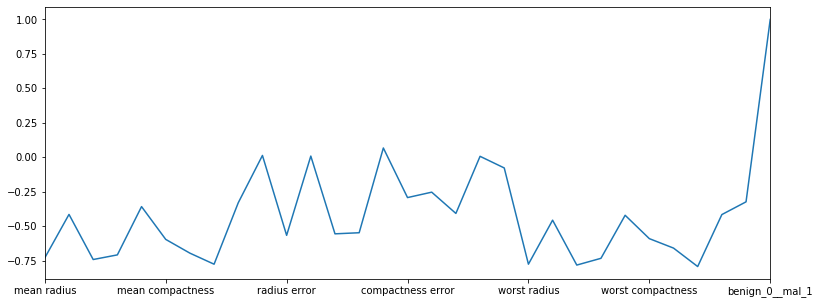

In [25]:
plt.figure(figsize=(13,5))
df.corr()['benign_0__mal_1'].plot()

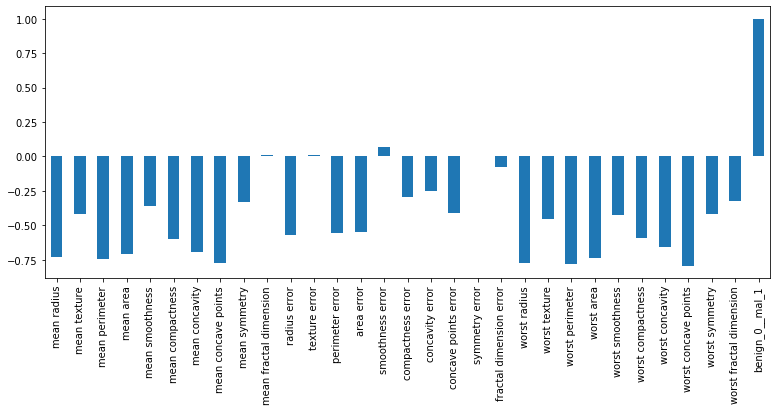

In [26]:
plt.figure(figsize=(13,5))
df.corr()['benign_0__mal_1'].plot(kind='bar')

In [23]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

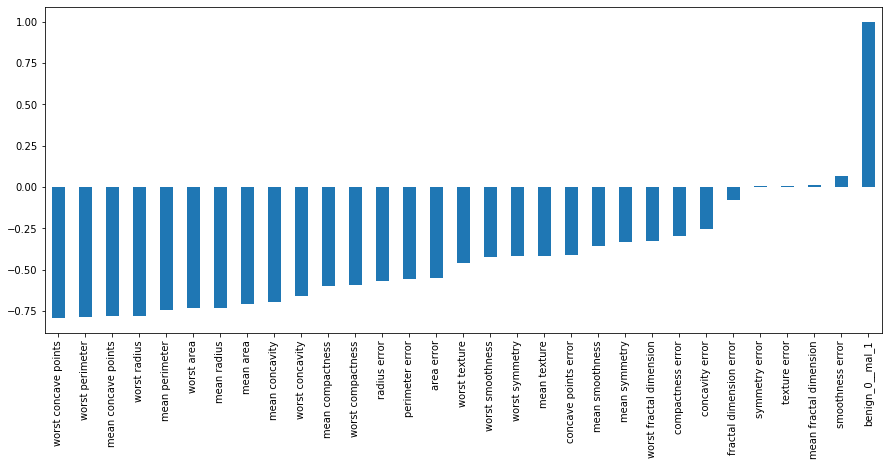

In [21]:
plt.figure(figsize=(15,6))
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

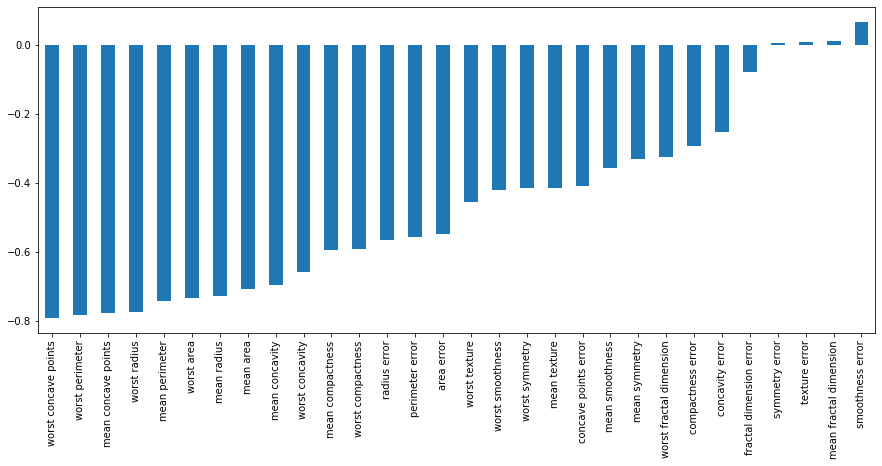

In [22]:
plt.figure(figsize=(15,6))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')
#grab everything but the last one

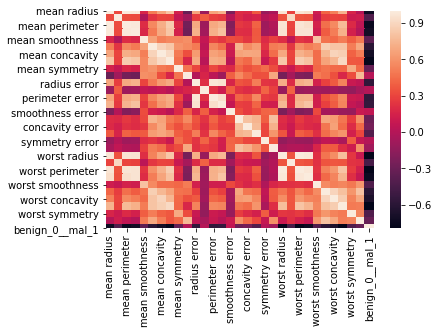

In [28]:
sns.heatmap(df.corr())

In [30]:
X = df.drop('benign_0__mal_1',axis=1).values #drop dan casting
y = df['benign_0__mal_1'].values

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) #INGAT JANGAN DI FIT

# Keras Classification Code 2 - Dealing with Overfitting and Evaluation

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [40]:
print (X_train.shape)
print (X_test.shape)

(426, 30)
(143, 30)


In [43]:
#model attempt 1

model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#because this is BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid')) #output

model.compile(loss='binary_crossentropy',optimizer='adam')

In [46]:
model.fit(x=X_train,y=y_train,
          epochs=600,validation_data=(X_test,y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6840 - val_loss: 0.6626
Epoch 2/600
426/426 [==============================] - 0s 115us/sample - loss: 0.6360 - val_loss: 0.6144
Epoch 3/600
426/426 [==============================] - 0s 82us/sample - loss: 0.5910 - val_loss: 0.5695
Epoch 4/600
426/426 [==============================] - 0s 110us/sample - loss: 0.5478 - val_loss: 0.5252
Epoch 5/600
426/426 [==============================] - 0s 110us/sample - loss: 0.5015 - val_loss: 0.4766
Epoch 6/600
426/426 [==============================] - 0s 73us/sample - loss: 0.4553 - val_loss: 0.4265
Epoch 7/600
426/426 [==============================] - 0s 73us/sample - loss: 0.4085 - val_loss: 0.3812
Epoch 8/600
426/426 [==============================] - 0s 125us/sample - loss: 0.3688 - val_loss: 0.3393
Epoch 9/600
426/426 [==============================] - 0s 110us/sample - loss: 0.3319 - val_loss: 0.3048
Epoch 10/600
4

426/426 [==============================] - 0s 125us/sample - loss: 0.0561 - val_loss: 0.1079
Epoch 79/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0545 - val_loss: 0.1013
Epoch 80/600
426/426 [==============================] - 0s 125us/sample - loss: 0.0528 - val_loss: 0.1038
Epoch 81/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0527 - val_loss: 0.1043
Epoch 82/600
426/426 [==============================] - 0s 116us/sample - loss: 0.0524 - val_loss: 0.1005
Epoch 83/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0531 - val_loss: 0.1046
Epoch 84/600
426/426 [==============================] - 0s 97us/sample - loss: 0.0528 - val_loss: 0.1048
Epoch 85/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0533 - val_loss: 0.1002
Epoch 86/600
426/426 [==============================] - 0s 89us/sample - loss: 0.0511 - val_loss: 0.1043
Epoch 87/600
426/426 [==============================] - 0s 110u

426/426 [==============================] - 0s 120us/sample - loss: 0.0394 - val_loss: 0.1189
Epoch 156/600
426/426 [==============================] - 0s 118us/sample - loss: 0.0406 - val_loss: 0.1199
Epoch 157/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0389 - val_loss: 0.1151
Epoch 158/600
426/426 [==============================] - 0s 95us/sample - loss: 0.0395 - val_loss: 0.1191
Epoch 159/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0411 - val_loss: 0.1164
Epoch 160/600
426/426 [==============================] - 0s 95us/sample - loss: 0.0424 - val_loss: 0.1130
Epoch 161/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0402 - val_loss: 0.1216
Epoch 162/600
426/426 [==============================] - 0s 118us/sample - loss: 0.0383 - val_loss: 0.1220
Epoch 163/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0391 - val_loss: 0.1209
Epoch 164/600
426/426 [==============================] -

Epoch 232/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0349 - val_loss: 0.1225
Epoch 233/600
426/426 [==============================] - 0s 95us/sample - loss: 0.0314 - val_loss: 0.1118
Epoch 234/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0303 - val_loss: 0.1313
Epoch 235/600
426/426 [==============================] - 0s 95us/sample - loss: 0.0316 - val_loss: 0.1108
Epoch 236/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0306 - val_loss: 0.1149
Epoch 237/600
426/426 [==============================] - 0s 107us/sample - loss: 0.0326 - val_loss: 0.1272
Epoch 238/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0321 - val_loss: 0.1161
Epoch 239/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0331 - val_loss: 0.1210
Epoch 240/600
426/426 [==============================] - 0s 119us/sample - loss: 0.0311 - val_loss: 0.1159
Epoch 241/600
426/426 [====================

Epoch 309/600
426/426 [==============================] - 0s 139us/sample - loss: 0.0267 - val_loss: 0.0957
Epoch 310/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0350 - val_loss: 0.1603
Epoch 311/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0259 - val_loss: 0.1049
Epoch 312/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0281 - val_loss: 0.1129
Epoch 313/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0236 - val_loss: 0.1066
Epoch 314/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0235 - val_loss: 0.1038
Epoch 315/600
426/426 [==============================] - 0s 95us/sample - loss: 0.0234 - val_loss: 0.1111
Epoch 316/600
426/426 [==============================] - 0s 119us/sample - loss: 0.0263 - val_loss: 0.1015
Epoch 317/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0275 - val_loss: 0.1222
Epoch 318/600
426/426 [==================

426/426 [==============================] - 0s 119us/sample - loss: 0.0194 - val_loss: 0.1065
Epoch 386/600
426/426 [==============================] - 0s 95us/sample - loss: 0.0193 - val_loss: 0.0948
Epoch 387/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0178 - val_loss: 0.0970
Epoch 388/600
426/426 [==============================] - 0s 119us/sample - loss: 0.0177 - val_loss: 0.0954
Epoch 389/600
426/426 [==============================] - 0s 118us/sample - loss: 0.0186 - val_loss: 0.0930
Epoch 390/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0178 - val_loss: 0.0958
Epoch 391/600
426/426 [==============================] - 0s 119us/sample - loss: 0.0181 - val_loss: 0.0959
Epoch 392/600
426/426 [==============================] - 0s 112us/sample - loss: 0.0215 - val_loss: 0.1148
Epoch 393/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0195 - val_loss: 0.0935
Epoch 394/600
426/426 [==============================

Epoch 462/600
426/426 [==============================] - 0s 156us/sample - loss: 0.0130 - val_loss: 0.0960
Epoch 463/600
426/426 [==============================] - 0s 119us/sample - loss: 0.0133 - val_loss: 0.0906
Epoch 464/600
426/426 [==============================] - 0s 118us/sample - loss: 0.0129 - val_loss: 0.0938
Epoch 465/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0134 - val_loss: 0.0978
Epoch 466/600
426/426 [==============================] - 0s 95us/sample - loss: 0.0126 - val_loss: 0.0987
Epoch 467/600
426/426 [==============================] - 0s 119us/sample - loss: 0.0130 - val_loss: 0.0918
Epoch 468/600
426/426 [==============================] - 0s 119us/sample - loss: 0.0139 - val_loss: 0.0951
Epoch 469/600
426/426 [==============================] - 0s 97us/sample - loss: 0.0135 - val_loss: 0.0975
Epoch 470/600
426/426 [==============================] - 0s 118us/sample - loss: 0.0202 - val_loss: 0.0822
Epoch 471/600
426/426 [=================

426/426 [==============================] - 0s 149us/sample - loss: 0.0094 - val_loss: 0.0896
Epoch 539/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0090 - val_loss: 0.1076
Epoch 540/600
426/426 [==============================] - 0s 155us/sample - loss: 0.0108 - val_loss: 0.0902
Epoch 541/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0104 - val_loss: 0.1040
Epoch 542/600
426/426 [==============================] - 0s 155us/sample - loss: 0.0093 - val_loss: 0.0973
Epoch 543/600
426/426 [==============================] - 0s 203us/sample - loss: 0.0091 - val_loss: 0.1031
Epoch 544/600
426/426 [==============================] - 0s 214us/sample - loss: 0.0091 - val_loss: 0.0979
Epoch 545/600
426/426 [==============================] - 0s 191us/sample - loss: 0.0095 - val_loss: 0.1000
Epoch 546/600
426/426 [==============================] - 0s 131us/sample - loss: 0.0086 - val_loss: 0.1095
Epoch 547/600
426/426 [============================

In [47]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,0.684018,0.662581
1,0.635992,0.614422
2,0.591045,0.569486
3,0.547825,0.525202
4,0.501513,0.476603
...,...,...
595,0.006977,0.116299
596,0.007002,0.110408
597,0.006641,0.113796
598,0.006729,0.117013


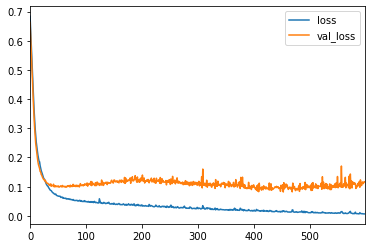

In [48]:
losses = pd.DataFrame(model.history.history)
losses.plot()

ini adalah contoh yg bagus untuk 'Overfitting', trained to much.
Jd solusinya adalah:

- use early stopping

yang terjadi:
- overfitting
- banyak noise
- performance buruk

In [49]:
#model attempt 2
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#because this is BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid')) #output

model.compile(loss='binary_crossentropy',optimizer='adam')

In [50]:
from tensorflow.keras.callbacks import EarlyStopping

In [51]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, t

In [52]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',
                          verbose=1,patience=25)

In [54]:
model.fit(x=X_train,y=y_train,
          epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 1ms/sample - loss: 0.6826 - val_loss: 0.6570
Epoch 2/600
426/426 [==============================] - 0s 73us/sample - loss: 0.6389 - val_loss: 0.6155
Epoch 3/600
426/426 [==============================] - 0s 89us/sample - loss: 0.5952 - val_loss: 0.5725
Epoch 4/600
426/426 [==============================] - 0s 73us/sample - loss: 0.5489 - val_loss: 0.5233
Epoch 5/600
426/426 [==============================] - 0s 147us/sample - loss: 0.4981 - val_loss: 0.4714
Epoch 6/600
426/426 [==============================] - 0s 89us/sample - loss: 0.4456 - val_loss: 0.4188
Epoch 7/600
426/426 [==============================] - 0s 147us/sample - loss: 0.3968 - val_loss: 0.3693
Epoch 8/600
426/426 [==============================] - 0s 125us/sample - loss: 0.3517 - val_loss: 0.3266
Epoch 9/600
426/426 [==============================] - 0s 89us/sample - loss: 0.3143 - val_loss: 0.2909
Epoch 10/600
426

426/426 [==============================] - 0s 74us/sample - loss: 0.0558 - val_loss: 0.1325
Epoch 79/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0599 - val_loss: 0.1172
Epoch 80/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0649 - val_loss: 0.1402
Epoch 81/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0563 - val_loss: 0.1218
Epoch 00081: early stopping


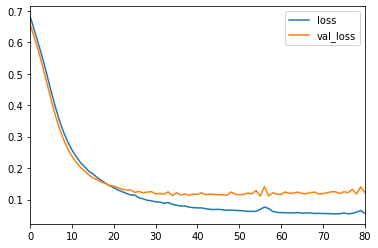

In [57]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

apa yang terjadi:

- data loss dan validation loss berhenti saat kurva mau naik lagi
- training akan berhenti disaat akan mau buruk kl dilaknjutkan
- performance ok, lebih bagus drpd sebellumnnya

In [58]:
#model attempt 3
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
#dropout(rate)
#rate = 1 -> 100% neuron secara random dinonaktifkan saat proses bacht training selanjutnya
#rate = 0 -> ga ada yg dinonaktifkan secara random
#biasanya rate adalah 0.2 ~ 0.5
#biar beberapa weight dan bias tdk terupdate saat epochs

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

#because this is BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid')) #output

model.compile(loss='binary_crossentropy',optimizer='adam')

In [59]:
from tensorflow.keras.callbacks import EarlyStopping

In [60]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',
                          verbose=1,patience=25)

In [61]:
model.fit(x=X_train,y=y_train,
          epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6949 - val_loss: 0.6820
Epoch 2/600
426/426 [==============================] - 0s 127us/sample - loss: 0.6776 - val_loss: 0.6688
Epoch 3/600
426/426 [==============================] - 0s 103us/sample - loss: 0.6649 - val_loss: 0.6512
Epoch 4/600
426/426 [==============================] - 0s 112us/sample - loss: 0.6531 - val_loss: 0.6281
Epoch 5/600
426/426 [==============================] - 0s 117us/sample - loss: 0.6383 - val_loss: 0.6116
Epoch 6/600
426/426 [==============================] - 0s 136us/sample - loss: 0.6347 - val_loss: 0.5938
Epoch 7/600
426/426 [==============================] - 0s 105us/sample - loss: 0.6162 - val_loss: 0.5753
Epoch 8/600
426/426 [==============================] - 0s 103us/sample - loss: 0.5911 - val_loss: 0.5538
Epoch 9/600
426/426 [==============================] - 0s 108us/sample - loss: 0.5550 - val_loss: 0.5285
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 101us/sample - loss: 0.1321 - val_loss: 0.0972
Epoch 79/600
426/426 [==============================] - 0s 110us/sample - loss: 0.1295 - val_loss: 0.0935
Epoch 80/600
426/426 [==============================] - 0s 110us/sample - loss: 0.1262 - val_loss: 0.0899
Epoch 81/600
426/426 [==============================] - 0s 113us/sample - loss: 0.1090 - val_loss: 0.0911
Epoch 82/600
426/426 [==============================] - 0s 99us/sample - loss: 0.1201 - val_loss: 0.1030
Epoch 83/600
426/426 [==============================] - 0s 99us/sample - loss: 0.1229 - val_loss: 0.0920
Epoch 84/600
426/426 [==============================] - 0s 103us/sample - loss: 0.1020 - val_loss: 0.0993
Epoch 85/600
426/426 [==============================] - 0s 96us/sample - loss: 0.1293 - val_loss: 0.0940
Epoch 86/600
426/426 [==============================] - 0s 96us/sample - loss: 0.1178 - val_loss: 0.0853
Epoch 87/600
426/426 [============================

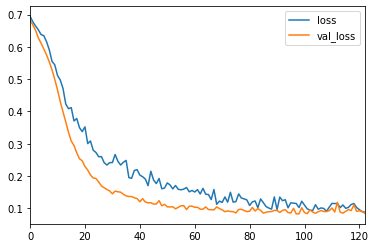

In [62]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

notice: training loss and validation loss both quickly going down and did more epochs

essentially flattening out at the same rate, significantly increase performance

apa yang terjadi:
- jumlah trainingg banyak, tp tdk terjadi overfitting
- terjadi zig-zag karena setiap saat kurva mau naik pada setiap epoch akan dilakukan penonaktifan neuron secara random ->mencegah overfitting setiap epocj

In [63]:
model.predict_classes(X_test) #karena ini binary classification

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
    

In [64]:
predictions = model.predict_classes(X_test)

In [65]:
from sklearn.metrics import classification_report,confusion_matrix

In [69]:
print(classification_report(y_test,predictions))
#selalu (y_TRUE,y_PRED)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.99      0.99      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [68]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 1 87]]


very good performance, hanya miss 1 point SAJA di test set